In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.log(10)

2.302585092994046

In [13]:
def f(girth):
    return -107.0 + 19.91*np.log(girth)

In [14]:
def g(length):
    return 7.712*np.log(length)

In [58]:
set(df['Age'])

{'10-15', '15-20', '2-5', '5-10', '<2', '>20'}

In [60]:
bcs_dict = {}
age_dict = {}
bcs_dict[1.5] = -10
bcs_dict[2.0] = -6
bcs_dict[2.5] = -5
bcs_dict[3.0] = 0
bcs_dict[3.5] = 6
bcs_dict[4.0] = 14
age_dict['<2'] = -8
age_dict['2-5'] = -4
age_dict['5-10'] = 0
age_dict['10-15'] = 0
age_dict['15-20'] = 0
age_dict['>20'] = 0

In [10]:
def h_inverse(h):
    return ((h/2)+1)**2

In [66]:
#Get prediction based on attributes
def get_weight(bcs, age, length, girth):
    bcs_change = bcs_dict[bcs]
    age_change = age_dict[age]
    return h_inverse(f(girth) + g(length))+ bcs_change + age_change

In [67]:
#Reproducing example given
print(get_weight(3, '5-10', 103, 122))

174.12239409550034


In [23]:
df = pd.read_csv('mysavefile.csv')

In [26]:
df.head()

,Unnamed: 0,BCS,Age,Sex,Length,Girth,Height,Weight,WeightAlt
0,1,3.0,<2,stallion,78,90,90,77,NaN
1,2,2.5,<2,stallion,91,97,94,100,NaN
2,3,1.5,<2,stallion,74,93,95,74,NaN
3,4,3.0,<2,female,87,109,96,116,NaN
4,5,2.5,<2,female,79,98,91,91,NaN


In [33]:
weight = list(df['Weight'])

In [34]:
weights.sort()

In [35]:
print(weights[:5])
#Assume donkey with weight 27 kilos 

[27, 65, 71, 72, 74]


In [37]:
df[df['Weight']==27]

,Unnamed: 0,BCS,Age,Sex,Length,Girth,Height,Weight,WeightAlt
8,9,3.0,<2,stallion,46,66,71,27,NaN


In [31]:
df[df['BCS']==1.0]

,Unnamed: 0,BCS,Age,Sex,Length,Girth,Height,Weight,WeightAlt
445,446,1.0,>20,female,97,109,102,115,NaN


In [32]:
df[df['BCS']==4.5]

,Unnamed: 0,BCS,Age,Sex,Length,Girth,Height,Weight,WeightAlt
291,292,4.5,10-15,female,107,130,106,227,NaN


In [45]:
df = df.drop([8,291,445])

In [102]:
df = df.sort_values('Weight', ignore_index = True)

In [104]:
train = df[df.index % 5 != 4]  
test = df[df.index % 5 == 4]

In [106]:
test.head()

,Unnamed: 0,BCS,Age,Sex,Length,Girth,Height,Weight,WeightAlt
4,45,3.0,<2,female,80,94,89,75,NaN
9,33,2.5,<2,stallion,72,97,94,89,NaN
14,39,3.0,<2,female,85,96,93,94,NaN
19,37,2.5,<2,female,87,100,98,96,NaN
24,24,2.5,<2,female,85,100,96,102,NaN


In [107]:
test['Prediction'] = np.nan

/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
for index, row in test.iterrows():
    bcs = row['BCS']
    age = row['Age']
    girth = row['Girth']
    length = row['Length']
    test.at[index,'Prediction'] = get_weight(bcs, age, length, girth)

In [109]:
test.head()

,Unnamed: 0,BCS,Age,Sex,Length,Girth,Height,Weight,WeightAlt,Prediction
4,45,3.0,<2,female,80,94,89,75,NaN,84.652065
9,33,2.5,<2,stallion,72,97,94,89,NaN,77.860403
14,39,3.0,<2,female,85,96,93,94,NaN,93.383744
19,37,2.5,<2,female,87,100,98,96,NaN,98.619455
24,24,2.5,<2,female,85,100,96,102,NaN,96.732590


In [110]:
true_weights = np.array(test['Weight'])
predicted_weights = np.array(test['Prediction'])

Text(0, 0.5, 'Actual weight, kg')

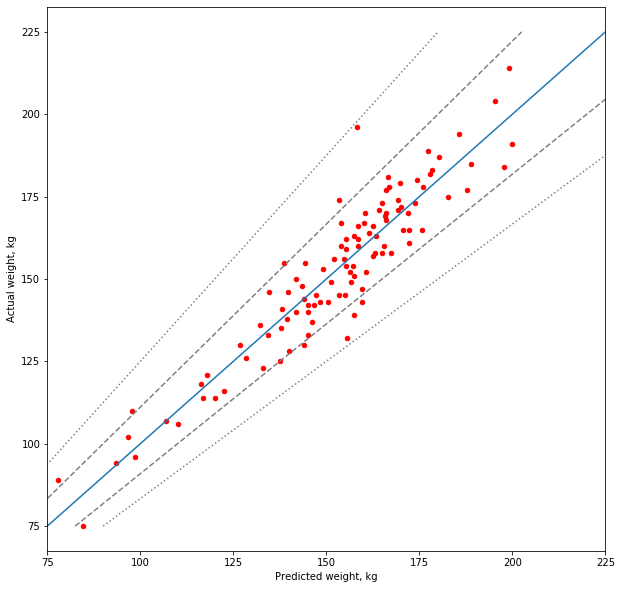

In [139]:
plt.figure(figsize=(10, 10))
y = np.arange(75,226)
x_actual = y
x_plus10 = y*1.1
x_plus20 = y*1.2
x_neg10 = y*0.9
x_neg20 = y*0.8
plt.scatter(predicted_weights, true_weights, s = 20, c='r')
#plt.plot(predicted_weights, true_weights,'ro')
plt.plot(x_actual, y)
plt.plot(x_plus10, y, color='grey', linestyle='dashed')
plt.plot(x_neg10, y, color='grey', linestyle='dashed')
plt.plot(x_plus20, y, color='grey', linestyle='dotted')
plt.plot(x_neg20, y, color='grey', linestyle='dotted')
plt.xlim(75,225)
plt.xticks(np.arange(75,230,25))
plt.yticks(np.arange(75,230,25))
plt.xlabel('Predicted weight, kg')
plt.ylabel('Actual weight, kg')

In [140]:
residuals = true_weights - predicted_weights

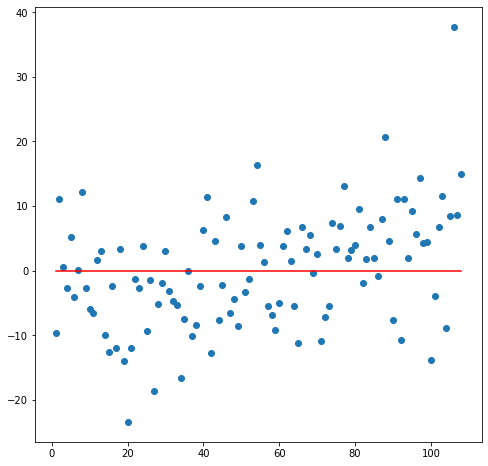

In [151]:
plt.figure(figsize=(8, 8))
x = np.arange(1,109)
y = np.zeros(108)
plt.scatter(x,residuals)
plt.plot(x,y,color='r')
plt.show()

In [153]:
MSE = np.mean(residuals**2)
print(MSE)

80.11876129075209
